In [1]:
% matplotlib.pyplot inline


UsageError: Line magic function `%` not found.


In [2]:
# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Location of the data
city_filepath = os.path.join('Resources', 'city_data.csv')
ride_filepath = os.path.join('Resources', 'ride_data.csv')

In [3]:
city_data = pd.read_csv(city_filepath)
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
ride_data = pd.read_csv(ride_filepath)
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [5]:
all_data = ride_data.merge(city_data, on='city')
all_data['date'] = pd.to_datetime(all_data['date'])
all_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [6]:
# Gather Total Rides, Average fare, and Driver count for each city sorted by city type; then graph it.
urban_cities_df = all_data[all_data['type'] == "Urban"]
rural_cities_df = all_data[all_data['type'] == "Rural"]
suburban_cities_df = all_data[all_data['type'] == "Suburban"]

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_driver_count = city_data[city_data['type']=='Rural'].set_index('city')['driver_count']
rural_fares = rural_cities_df.groupby(['city']).mean()['fare']

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_driver_count = city_data[city_data['type']=='Urban'].set_index('city')['driver_count']
urban_fares = urban_cities_df.groupby(['city']).mean()['fare']

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_driver_count = city_data[city_data['type']=='Suburban'].set_index('city')['driver_count']
suburban_fares = suburban_cities_df.groupby(['city']).mean()['fare']

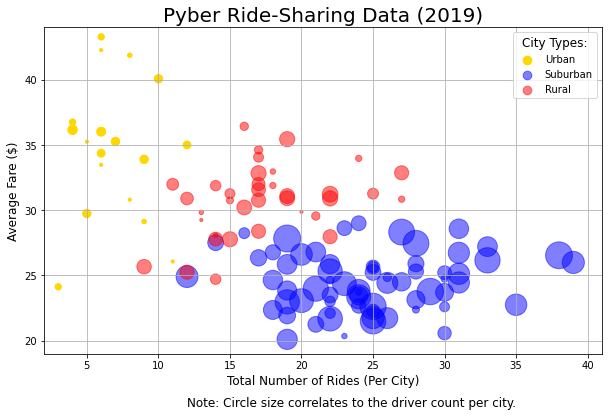

In [32]:
# The Graph 
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=rural_ride_count, y=rural_fares, s=10*rural_driver_count, color='gold', label="Urban")
ax.scatter(x=urban_ride_count, y=urban_fares, s=10*urban_driver_count, color='blue', label="Suburban", alpha=0.5)
ax.scatter(x=suburban_ride_count, y=suburban_fares, s=10*suburban_driver_count, color='red', label='Rural', alpha=0.5)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize='12')
ax.set_ylabel('Average Fare ($)', fontsize='12')
ax.set_title('Pyber Ride-Sharing Data (2019)', fontsize='20')
ax.set_xlim(min(rural_ride_count)-1, max(urban_ride_count)+2)
ax.set_ylim(round(min(urban_fares), 0)-1, round(max(rural_fares), 0)+1)
lgnd = ax.legend(mode='Expanded', loc="best", title="City Types:", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
ax.text(12,15,"Note: Circle size correlates to the driver count per city.", fontsize='12')
ax.grid(True)

fig.savefig('Analysis\\Pyber_Ride_Sharing_Data_2019.png')

In [119]:
# city type, average fare, total drivers, total rides
region_type_graph = pd.DataFrame()
region_type_graph['Total Rides']= all_data['type'].value_counts() # Total rides by city type
region_type_graph['Total Drivers'] = city_data.groupby(['type']).sum() # Total driver count
region_type_graph['Average Fare'] =  all_data.groupby(['type']).mean()['fare']  # average fare
region_type_graph['Median Fare'] = all_data.groupby(['type']).median()['fare']
# region_type_graph.plot.scatter(x='Total Rides', y='Average Fare', s='Total Drivers', color=['red', 'green', 'blue'], figsize=(8,8))
urban_driver_count

city
Richardfort           38
Williamsstad          59
Port Angela           67
Rodneyfort            34
West Robert           39
                      ..
Amandaburgh           12
Williamsview          46
New Jacobville        50
Port Samanthamouth    57
Roberthaven           47
Name: driver_count, Length: 66, dtype: int64

In [58]:
city_insights_df = pd.DataFrame()
city_insights_df['Total Rides'] = all_data.groupby(['city']).count()['ride_id']
city_insights_df['Total Drivers'] = city_data.set_index('city')['driver_count']
city_insights_df['Type'] = city_data.set_index('city')['type']
city_insights_df

,Total Rides,Total Drivers,Type
city,,,
Amandaburgh,18,12,Urban
Barajasview,22,26,Urban
Barronchester,16,11,Suburban
Bethanyland,18,22,Suburban
Bradshawfurt,10,7,Rural
...,...,...,...
West Robert,31,39,Urban
West Samuelburgh,25,73,Urban
Williamsonville,14,2,Suburban


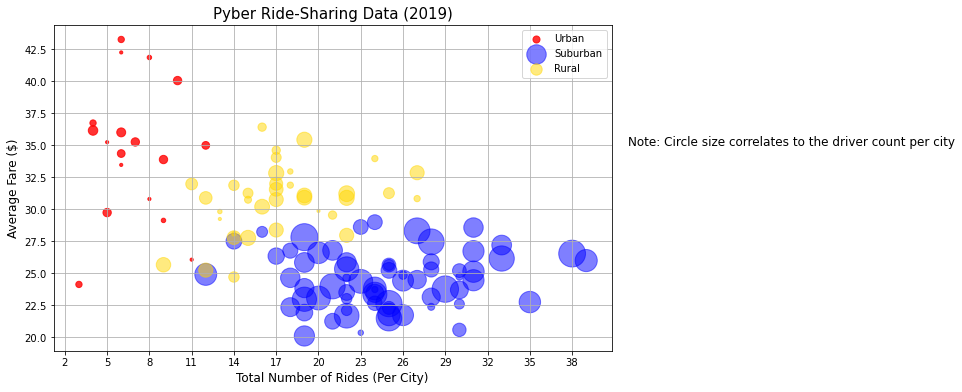

In [13]:

plt.subplots(figsize=(10,6))
plt.scatter(x=rural_ride_count, y=rural_fares, s=10*rural_driver_count, color='red', label="Urban", alpha=0.8)
plt.scatter(x=urban_ride_count, y=urban_fares, s=10*urban_driver_count, color='blue', label="Suburban", alpha=0.5)
plt.scatter(x=suburban_ride_count, y=suburban_fares, s=10*suburban_driver_count, color='gold', label='Rural', alpha=0.5)
plt.xlabel('Total Number of Rides (Per City)', fontsize='12')
plt.ylabel('Average Fare ($)', fontsize='12')
plt.title('Pyber Ride-Sharing Data (2019)', fontsize='15')
plt.xticks(np.arange(min(rural_ride_count)-1, max(urban_ride_count)+2, 3))
plt.yticks(np.arange(round(min(urban_fares), 0), round(max(rural_fares), 0)+1, 2.5))
plt.legend()
plt.text(42,35,"Note: Circle size correlates to the driver count per city", fontsize='12')
plt.grid(True)
plt.savefig('Analysis\\Pyber_Ride_Sharing_Data_2019.png')